In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:
X, y = make_moons(100, noise = 0.25, random_state = 2)

In [ ]:
X

array([[ 1.04051282e+00, -2.33491352e-02],
       [-5.54741398e-01,  1.27013832e+00],
       [-7.23715066e-02, -1.77901205e-01],
       [-4.71961272e-02,  1.21883595e+00],
       [ 9.13794475e-01,  8.59883240e-01],
       [ 5.41150127e-01,  6.95140255e-01],
       [ 7.03026094e-01, -2.57985072e-01],
       [-1.33401091e-01,  1.06959481e+00],
       [-1.14287718e-01,  8.97688273e-01],
       [ 1.01150903e+00,  8.49916582e-01],
       [ 2.12537198e+00,  5.08605794e-01],
       [ 1.70010780e+00,  7.16265767e-01],
       [ 1.55439712e+00, -8.60585592e-01],
       [ 5.55027808e-01,  5.76836247e-01],
       [ 1.15481964e+00, -1.43219905e-01],
       [ 2.86145607e-01,  1.32282616e+00],
       [ 4.89545211e-01,  2.91536879e-01],
       [-6.67796665e-01,  7.81730273e-01],
       [ 2.23453555e-01,  3.34602767e-02],
       [ 1.18698241e+00, -3.39029325e-01],
       [-6.08507947e-01,  4.54265298e-01],
       [ 8.29543872e-01,  7.39089646e-01],
       [ 1.13299058e+00, -2.62270185e-01],
       [-1.

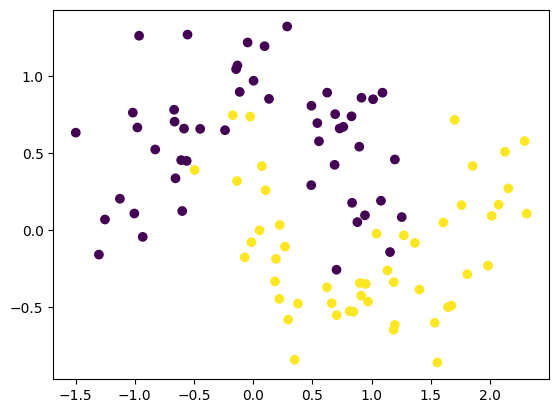

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show();

In [ ]:
model = Sequential()

model.add(Dense(128, activation = "relu", input_dim = 2))
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam = Adam(learning_rate = 0.01)
model.compile(loss = "binary_crossentropy", optimizer = adam, metrics=["accuracy"])
history = model.fit(X, y, epochs = 2000, validation_split = 0.2, verbose = True)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.7406 - loss: 0.6192 - val_accuracy: 0.9000 - val_loss: 0.3604
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8344 - loss: 0.4042 - val_accuracy: 0.9000 - val_loss: 0.1974
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8547 - loss: 0.3781 - val_accuracy: 0.9000 - val_loss: 0.2270
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8469 - loss: 0.3851 - val_accuracy: 0.9000 - val_loss: 0.2375
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8508 - loss: 0.3878 - val_accuracy: 0.9000 - val_loss: 0.2239
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8469 - loss: 0.3411 - val_accuracy: 0.9000 - val_loss: 0.2342
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8547 - loss: 0.3290 - val_accuracy: 0.9000 - val_loss: 0.2353
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8727 - loss: 0.2988 - val_accuracy: 0.9000 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


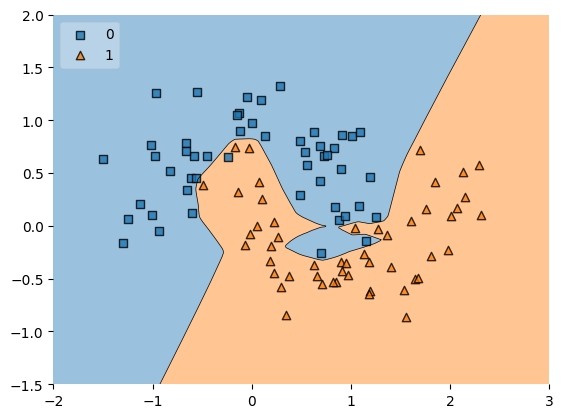

In [ ]:
plot_decision_regions(X,y.astype('int'), clf = model, legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

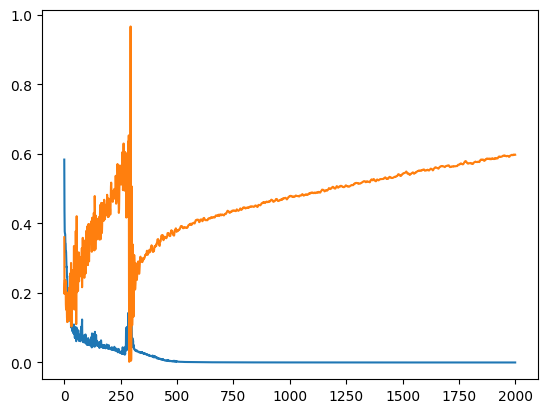

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model2 = Sequential()

model2.add(Dense(128, activation = "relu", input_dim = 2, kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation = "relu",kernel_regularizer = tf.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation = "sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,077 (199.52 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,052 (133.02 KB)

In [ ]:
adam = Adam(learning_rate = 0.01)
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics=["accuracy"])
history2 = model2.fit(X, y, epochs = 2000, validation_split = 0.2, verbose = True)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.5297 - loss: 4.2552 - val_accuracy: 0.8500 - val_loss: 2.6917
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7047 - loss: 2.4683 - val_accuracy: 0.9000 - val_loss: 1.5072
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8398 - loss: 1.3875 - val_accuracy: 0.9000 - val_loss: 0.8491
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8367 - loss: 0.8761 - val_accuracy: 0.9000 - val_loss: 0.5736
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8086 - loss: 0.6873 - val_accuracy: 0.9000 - val_loss: 0.5134
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8641 - loss: 0.5904 - val_accuracy: 0.9000 - val_loss: 0.6224
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8047 - loss: 0.6657 - val_accuracy: 0.9000 - val_loss: 0.5758
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8578 - loss: 0.6276 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


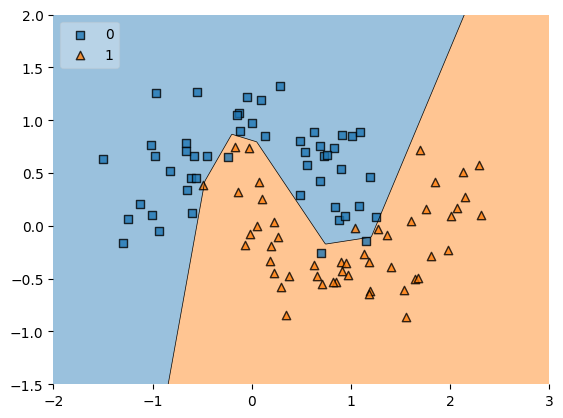

In [ ]:
plot_decision_regions(X,y.astype('int'), clf = model, legend = 2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()